In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.size"] = 22
plt.rcParams["axes.labelsize"] = 22
plt.rcParams["axes.titlesize"] = 22
plt.rcParams["xtick.labelsize"] = 22
plt.rcParams["ytick.labelsize"] = 22
plt.rcParams["legend.fontsize"] = 22
plt.rcParams["figure.titlesize"] = 22
plt.rcParams["lines.linewidth"] = 3.0

colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
(1.0, 0.4980392156862745, 0.054901960784313725),
(0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
(0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
(0.5803921568627451, 0.403921568627451, 0.7411764705882353),
(0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
(0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
(0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
(0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
(0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In /home/xc429/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/xc429/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/xc429/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/xc429/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/xc429/anaconda3/lib/python3.7/site-packages/matplotlib/

In [2]:
lrc_f = "run_11/train_reward.txt"
lc_f = "run_log_c/train_reward.txt"
lf_f = "run_fusion/train_reward.txt"

In [17]:
def read_log(fname):
    with open(fname, "r") as f:
        lines = [x for x in f.readlines() if "Test" in x]
    steps = []
    rewards = []
    for line in lines:
        l, r = line.split(" Reward ")
        steps.append(int(l.lstrip("Test: Step ")))
        rewards.append(eval(r.rstrip()))
        rewards[-1]["fusion"] = (rewards[-1]["log_c"] + rewards[-1]["log_reduced_c"]) / 2.0
    return steps, rewards
        
lrc = read_log(lrc_f)
lc = read_log(lc_f)
lf = read_log(lf_f)

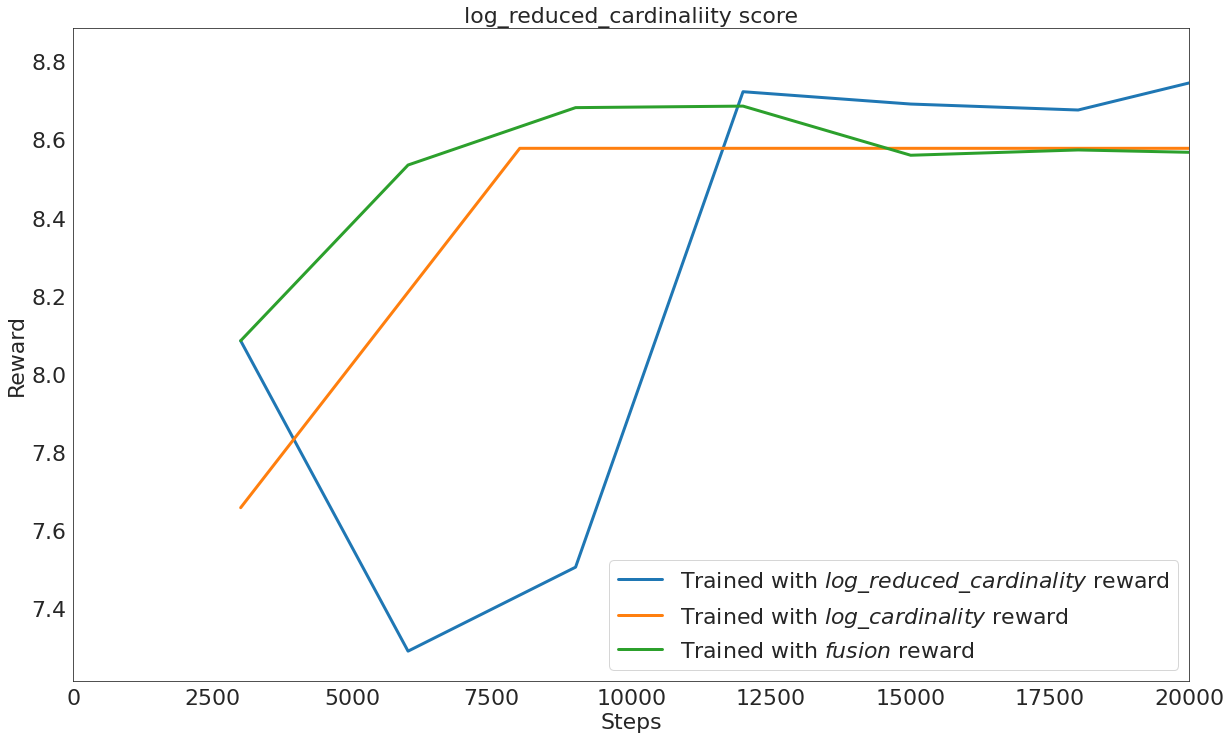

In [23]:
metric = ["direct_c", "log_c", "log_reduced_c", "fusion"][2]

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(20, 12))
    ax.plot(lrc[0], [x[metric] for x in lrc[1]], label=r"Trained with $log\_reduced\_cardinality$ reward")
    ax.plot(lc[0], [x[metric] for x in lc[1]], label=r"Trained with $log\_cardinality$ reward")
    ax.plot(lf[0], [x[metric] for x in lf[1]], label=r"Trained with $fusion$ reward")
    ax.legend()
    ax.set_title(f"{metric}ardinaliity score" if metric.endswith("_c") else f"{metric} score")
    ax.set_xlabel("Steps")
    ax.set_ylabel("Reward")
    ax.set_xlim(0, 20000)
#     for _i, j in zip(names, [kitti, waymo, waymo_kitti, refine]):
#         j[title] = np.array(j[title])
#         weights = np.ones_like(j[title]) / float(len(j[title])) * 100
#         ax.hist(j[title], label=_i, alpha=0.7, bins=100, weights=weights, range=ranges[title], color=colors[color[names.index(_i)]])
#     if title == 'h':
#         plt.legend()
#     plt.title('3D Bounding Box {} Distribution'.format(namedic[title].capitalize()))
#     plt.xlabel('Meters')
#     plt.ylabel('Percentage (%)')
#     plt.ylim(0, 10)
#     plt.yticks(range(0, 15, 5))
#     plt.savefig(f'statnorm_{namedic[title]}.pdf', dpi=200, bbox_inches="tight")